In [3]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# data collection and preprocessing

In [4]:
df=pd.read_csv('cars.csv')

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df.shape

(4340, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [8]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df.duplicated().sum()

763

In [10]:
#checking te dostribution of categorical data
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


# encoding categorical data


In [11]:
#encoding fuel column
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

#encoding seller_type column
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

#encoding transmission column
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoding owner column
df.replace({'owner':{'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}},inplace=True)

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,2


# test train split

In [13]:
X=df.drop(['name','selling_price'],axis=1)

Y=df['selling_price']

In [14]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      1
1     2007      50000     1            0             0      1
2     2012     100000     0            0             0      1
3     2017      46000     1            0             0      1
4     2014     141000     0            0             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      2
4336  2014      80000     0            0             0      2
4337  2009      83000     1            0             0      2
4338  2016      90000     0            0             0      1
4339  2016      40000     1            0             0      1

[4340 rows x 6 columns]


In [15]:
# spliting training and test data-
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


# model training
linear regression

In [16]:
lr=LinearRegression()

In [18]:
lr.fit(X_train,Y_train)

LinearRegression()

# model evaluation


In [21]:
# prediction on training data
Y_train_pred=lr.predict(X_train)

In [22]:
#r squared error
error_score=metrics.r2_score(Y_train,Y_train_pred)


In [23]:
print("error score:", error_score)

error score: 0.4392241063704887


# visualise the actual and predicted prices


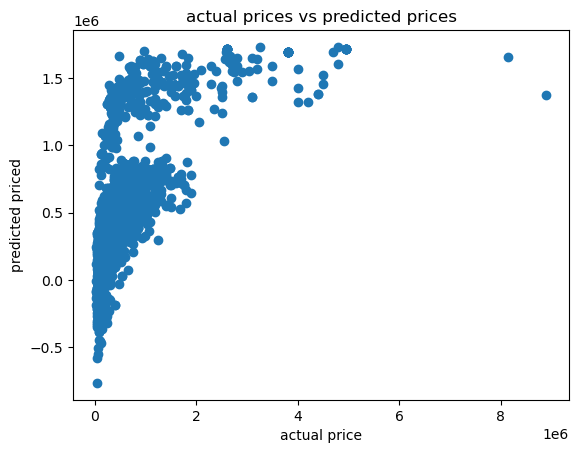

In [26]:
plt.scatter(Y_train,Y_train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted priced")
plt.title("actual prices vs predicted prices")
plt.show()

In [27]:
# prediction on test data
y_test_pred=lr.predict(X_test)

In [29]:
#r squared error
error_score_test=metrics.r2_score(Y_test,y_test_pred)

print("error_score_test:",error_score_test)

error_score_test: 0.49988298730549297


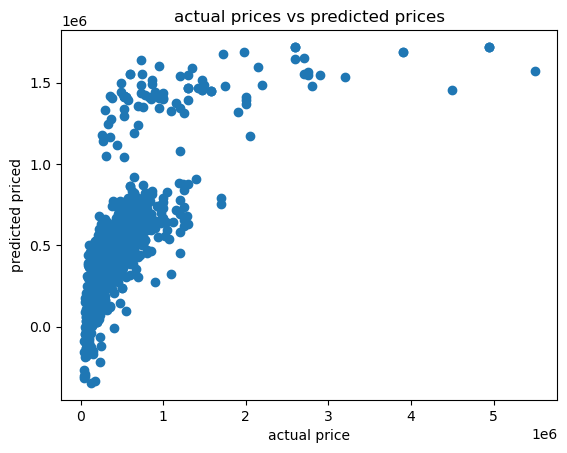

In [30]:
plt.scatter(Y_test,y_test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted priced")
plt.title("actual prices vs predicted prices")
plt.show()

# with lasso regression

In [32]:
lasso_model=Lasso()

In [33]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [34]:
# prediction on training data
Y_train_pred=lasso_model.predict(X_train)

In [35]:
#r squared error
error_score=metrics.r2_score(Y_train,Y_train_pred)


In [36]:
print("error score:", error_score)

error score: 0.43922410631884656


# visualise the actual and predicted prices


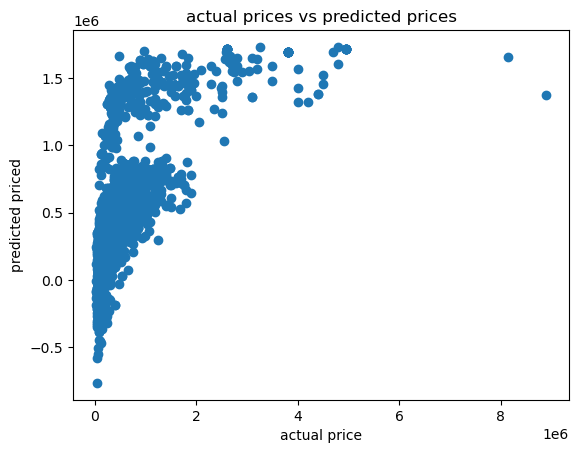

In [37]:
plt.scatter(Y_train,Y_train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted priced")
plt.title("actual prices vs predicted prices")
plt.show()

In [39]:
# prediction on test data
y_test_pred=lasso_model.predict(X_test)

In [41]:
#r squared error
error_score_test=metrics.r2_score(Y_test,y_test_pred)

print("error_score_test:",error_score_test)

error_score_test: 0.4998827106629772


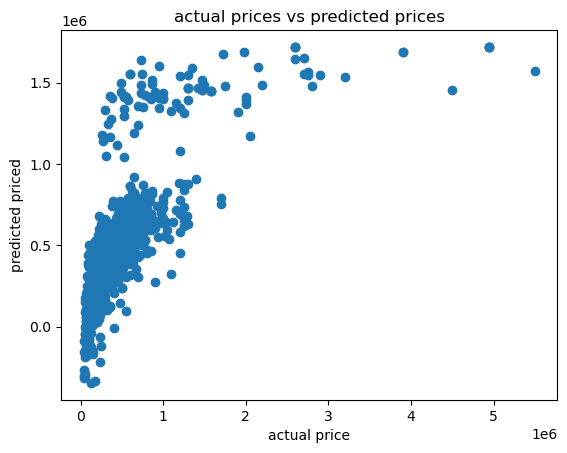

In [42]:
plt.scatter(Y_test,y_test_pred)
plt.xlabel("actual price")
plt.ylabel("predicted priced")
plt.title("actual prices vs predicted prices")
plt.show()